In [30]:
%matplotlib inline 
import pybinding as pb

In [ ]:
from math import sqrt
from math import sqrt, pi
theta=atan(h/a_cc1)
a=tan(theta)
c=cos(theta)**2
def plot1():
    t1=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2
             ,(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
             cos(pi/6)*c*a*(Vpppi-Vppsig)]
        ,[(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
          Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
          cos(pi/3)*a*c*(Vppsig-Vpppi)]
        ,[cos(pi/6)*c*a*(Vpppi-Vppsig),
          cos(pi/3)*a*c*(Vppsig-Vpppi),
          cos(pi/3)*a*c*(Vppsig-Vpppi)]]

    t2=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2,
         -(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
         cos(pi/6)*c*a*(Vpppi-Vppsig)]
    ,[-(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
      Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
      cos(pi/3)*a*c*(Vppsig-Vpppi)]
    ,[cos(pi/6)*c*a*(Vpppi-Vppsig),
      cos(pi/3)*a*c*(Vppsig-Vpppi),
      cos(pi/3)*a*c*(Vppsig-Vpppi)]]

    t3=[[Vpppi,
         c*Vppsig+(1-c)*Vpppi,
         0]
    ,[0,
      c*Vppsig+(1-c)*Vpppi,
      a*c*(Vpppi-Vppsig)]
    ,[0,
      a*c*(Vpppi-Vppsig),
      cos(pi/3)*a*c*(Vppsig-Vpppi)]]
    def monolayer_sb():
        a1 = 0.24595   # [nm] unit cell length
        a_cc = 0.142 # [nm] carbon-carbon distance
        t = -1.8      # [eV] nearest neighbour hopping

        lat = pb.Lattice(a1=[a1, 0],
                         a2=[a1/2, a1/2 * sqrt(3)])
        lat.add_sublattices(('A', [0, -a_cc/2,0], [0,0,.1]),
                            ('B', [0,  a_cc/2,h],[0,0,.1]))
        lat.add_hoppings(
            # inside the main cell
            ([0,  0], 'A', 'B', t1),
            # between neighboring cells
            ([1, -1], 'A', 'B', t2),
            ([0, -1], 'A', 'B', t3)
        )
        return lat

    #fig, ax = plt.subplots(nrows=1, ncols=3)
    lattice = monolayer_sb()
    # lattice.plot()
    # plt.show()
    # lattice.plot(axes='yz')
    # plt.show()
    # lattice.plot_brillouin_zone()
    # plt.show()
    model = pb.Model(
        lattice,
        pb.translational_symmetry()
    )
    solver = pb.solver.lapack(model)

    Gamma = [0, 0]
    K1 = [-4*pi / (3*sqrt(3)*a_cc1), 0]
    M = [0, 2*pi / (3*a_cc1)]
    K2 = [2*pi / (3*sqrt(3)*a_cc1), 2*pi / (3*a_cc1)]

    bands = solver.calc_bands( Gamma, K1,M, Gamma,)
    bands.plot(point_labels=[ r'$\Gamma$','K', 'M', r'$\Gamma$'])
a_cc1 = 0.142 
h=0.00

Vpppi=.2
Vppsig=-.3
plot1()

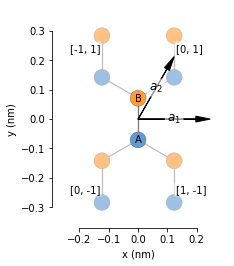

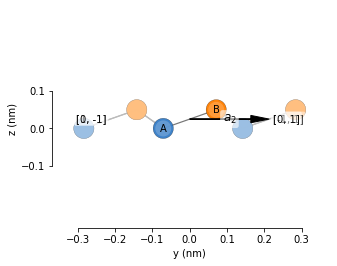

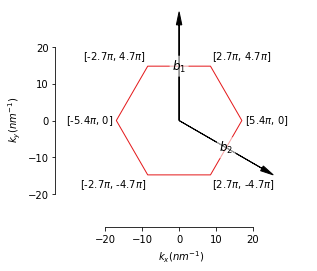

In [29]:
from math import sqrt
from math import sqrt, pi, atan
import matplotlib.pyplot as plt
from math import cos

a_cc1 = 0.142 
h=0.05
theta=atan(h/a_cc1)
c=cos(theta)**2
Vpppi=1.2
Vppsig=-0.6
t=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2,(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),2]
,[(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,2]
,[3,4,1]]
def monolayer_sb():
    a = 0.24595   
    a_cc = a_cc1 
    t = -1.8      

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2,0]),
                        ('B', [0,  a_cc/2,h]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

#fig, ax = plt.subplots(nrows=1, ncols=3)
lattice = monolayer_sb()
lattice.plot()
plt.show()
lattice.plot("yz")
plt.show()
lattice.plot_brillouin_zone()
plt.show()

In [ ]:
from math import cos
c=cos(theta)**2
t=[[Vpppi(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2,(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),2]
,[(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),Vpppi(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,2]
,[3,4,1]]

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.      0.     ]
 [0.5     0.86603 0.5    ]]
k-space metric tensor
 [[ 1.25 -0.5 ]
 [-0.5   1.  ]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.      0.     ]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.30046  from  [0.66667 0.33333]  to  [0.5 0.5]
  length = 0.55902  from  [0.5 0.5]  to  [0. 0.]
node distance list: [0.      0.66667 0.96713 1.52615]
node index list:    [  0  52  76 120]
----- k_path report end ------------

Done.



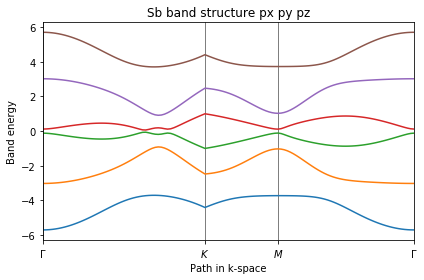

In [178]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi
import matplotlib.pyplot as plt
a_cc1 = 1
h=0.5
Vpppi=.33
Vppsig=-3
theta=atan(h/a_cc1)
a=tan(theta)
c=cos(theta)**2

t1=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2
     ,(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
     cos(pi/6)*c*a*(Vpppi-Vppsig)]
,[(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
  Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
  cos(pi/3)*a*c*(Vppsig-Vpppi)]
,[cos(pi/6)*c*a*(Vpppi-Vppsig),
  cos(pi/3)*a*c*(Vppsig-Vpppi),
  cos(pi/3)*a*c*(Vppsig-Vpppi)]]

t2=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2,
     -(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
     cos(pi/6)*c*a*(Vpppi-Vppsig)]
,[-(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
  Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
  cos(pi/3)*a*c*(Vppsig-Vpppi)]
,[cos(pi/6)*c*a*(Vpppi-Vppsig),
  cos(pi/3)*a*c*(Vppsig-Vpppi),
  cos(pi/3)*a*c*(Vppsig-Vpppi)]]

t3=[[Vpppi,
     0,
     0]
,[0,
  c*Vppsig+(1-c)*Vpppi,
  a*c*(Vpppi-Vppsig)]
,[0,
  a*c*(Vpppi-Vppsig),
  cos(pi/3)*a*c*(Vppsig-Vpppi)]]

lat=[[a_cc1,0.0,0],[0.5*a_cc1,np.sqrt(3.0)*a_cc1/2.0,h],[0,0,5*a_cc1]]

orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,.1],[2./3.,2./3.,.1],[2./3.,2./3.,.1]]


my_model=tb_model(2,3,lat,orb)


delta=0.0
t=-1.0

my_model.set_onsite([-delta,delta,-delta,-delta,delta,-delta])


my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
my_model.set_hop(t2[0][0], 1, 3, [ 0, 0,0])
my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

my_model.set_hop(t3[0][0], 0, 3, [ 0, -1,0])
my_model.set_hop(t3[0][1], 0, 4, [ 0, -1,0])
my_model.set_hop(t3[0][2], 0, 5, [ 0, -1,0])
my_model.set_hop(t3[0][0], 1, 3, [ 0, -1,0])
my_model.set_hop(t3[1][1], 1, 4, [ 0, -1,0])
my_model.set_hop(t3[1][2], 1, 5, [ 0, -1,0])
my_model.set_hop(t3[2][0], 2, 3, [ 0, -1,0])
my_model.set_hop(t3[2][1], 2, 4, [ 0, -1,0])
my_model.set_hop(t3[2][2], 2, 5, [ 0, -1,0])

# my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
# my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
# my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
# my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
# my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
# my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
# my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
# my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
# my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

my_model.set_hop(t1[0][0], 0, 3, [ -1, 0,0])
my_model.set_hop(t1[0][1], 0, 4, [ -1, 0,0])
my_model.set_hop(t1[0][2], 0, 5, [ -1, 0,0])
my_model.set_hop(t1[0][0], 1, 3, [ -1, 0,0])
my_model.set_hop(t1[1][1], 1, 4, [ -1, 0,0])
my_model.set_hop(t1[1][2], 1, 5, [ -1, 0,0])
my_model.set_hop(t1[2][0], 2, 3, [ -1, 0,0])
my_model.set_hop(t1[2][1], 2, 4, [ -1, 0,0])
my_model.set_hop(t1[2][2], 2, 5, [ -1, 0,0])

path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')

nk=121


(k_vec,k_dist,k_node)=my_model.k_path(path,nk)




evals=my_model.solve_all(k_vec)



fig, ax = plt.subplots()

ax.set_xlim(k_node[0],k_node[-1])

ax.set_xticks(k_node)
ax.set_xticklabels(label)

for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')

ax.set_title("Sb band structure px py pz")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")


for i in range(len(orb)):
    ax.plot(k_dist,evals[i])


fig.tight_layout()
fig.savefig("graphene.pdf")

print('Done.\n')

Berry flux on square patch with length:  0.5
  centered at k-point:  [0 0]
  for band 0 equals    :  -1.7763568394002505e-15
  for band 1 equals    :  -2.7755575615628914e-17
  for both bands equals:  -1.3877787807814457e-15

Done.



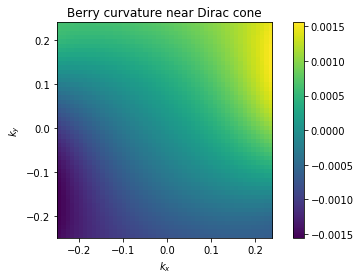

In [180]:
square_step=51
square_center=np.array([0,0])
square_length=.5
# two-dimensional wf_array to store wavefunctions on the path
w_square=wf_array(my_model,[square_step,square_step])
all_kpt=np.zeros((square_step,square_step,2))
# now populate array with wavefunctions
for i in range(square_step):
    for j in range(square_step):
        # construct k-point on the square patch
        kpt=np.array([square_length*(-0.5+float(i)/float(square_step-1)),
                      square_length*(-0.5+float(j)/float(square_step-1))])
        kpt+=square_center
        # store k-points for plotting
        all_kpt[i,j,:]=kpt
        # find eigenvectors at this k-point
        (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
        # store eigenvector into wf_array object
        w_square[i,j]=evec

# compute Berry flux on this square patch
print("Berry flux on square patch with length: ",square_length)
print("  centered at k-point: ",square_center)
print("  for band 0 equals    : ", w_square.berry_flux([2]))
print("  for band 1 equals    : ", w_square.berry_flux([3]))
print("  for both bands equals: ", w_square.berry_flux([2,3]))
print()

# also plot Berry phase on each small plaquette of the mesh
plaq=w_square.berry_flux([2,3],individual_phases=True)
#
fig, ax = plt.subplots()
plot=ax.imshow(plaq.T,origin="lower",
          extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                  all_kpt[0,0,1],all_kpt[ 0,-2,1],))
ax.set_title("Berry curvature near Dirac cone")
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")
fig.tight_layout()
plt.colorbar(plot)
fig.savefig("cone_phases.pdf")

print('Done.\n')

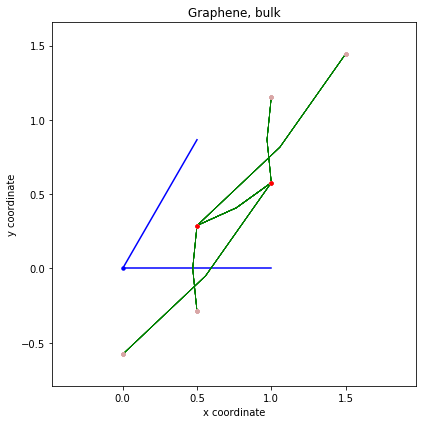

In [138]:
(fig,ax)=my_model.visualize(0,1)
ax.set_title("Graphene, bulk")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()

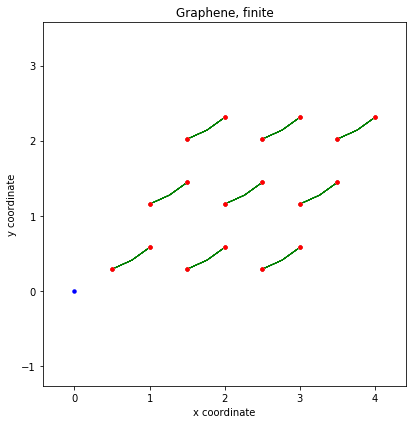

In [449]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi
import matplotlib.pyplot as plt
a_cc1 = 1
h=0.0
theta=atan(h/a_cc1)
a=tan(theta)
c=cos(theta)**2
Vpppi=.33
Vppsig=-.97
t1=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2
     ,(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
     cos(pi/6)*c*a*(Vpppi-Vppsig)]
,[(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
  Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
  cos(pi/3)*a*c*(Vppsig-Vpppi)]
,[cos(pi/6)*c*a*(Vpppi-Vppsig),
  cos(pi/3)*a*c*(Vppsig-Vpppi),
  cos(pi/3)*a*c*(Vppsig-Vpppi)]]

t2=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2,
     -(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
     cos(pi/6)*c*a*(Vpppi-Vppsig)]
,[-(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
  Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
  cos(pi/3)*a*c*(Vppsig-Vpppi)]
,[cos(pi/6)*c*a*(Vpppi-Vppsig),
  cos(pi/3)*a*c*(Vppsig-Vpppi),
  cos(pi/3)*a*c*(Vppsig-Vpppi)]]

t3=[[Vpppi,
     0,
     0]
,[0,
  c*Vppsig+(1-c)*Vpppi,
  a*c*(Vpppi-Vppsig)]
,[0,
  a*c*(Vpppi-Vppsig),
  cos(pi/3)*a*c*(Vppsig-Vpppi)]]

lat=[[a_cc1,0.0,0],[0.5*a_cc1,np.sqrt(3.0)*a_cc1/2.0,h],[0,0,5*a_cc1]]

orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,.1],[2./3.,2./3.,.1],[2./3.,2./3.,.1]]


my_model=tb_model(2,3,lat,orb)


delta=0.0
t=-1.0

my_model.set_onsite([-delta,delta,-delta,-delta,delta,-delta])

my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

my_model.set_hop(t3[0][0], 0, 3, [ 0, -1,0])
my_model.set_hop(t3[0][1], 0, 4, [ 0, -1,0])
my_model.set_hop(t3[0][2], 0, 5, [ 0, -1,0])
my_model.set_hop(t3[1][0], 1, 3, [ 0, -1,0])
my_model.set_hop(t3[1][1], 1, 4, [ 0, -1,0])
my_model.set_hop(t3[1][2], 1, 5, [ 0, -1,0])
my_model.set_hop(t3[2][0], 2, 3, [ 0, -1,0])
my_model.set_hop(t3[2][1], 2, 4, [ 0, -1,0])
my_model.set_hop(t3[2][2], 2, 5, [ 0, -1,0])


my_model.set_hop(t1[0][0], 0, 3, [ -1, 0,0])
my_model.set_hop(t1[0][1], 0, 4, [ -1, 0,0])
my_model.set_hop(t1[0][2], 0, 5, [ -1, 0,0])
my_model.set_hop(t1[1][0], 1, 3, [ -1, 0,0])
my_model.set_hop(t1[1][1], 1, 4, [ -1, 0,0])
my_model.set_hop(t1[1][2], 1, 5, [ -1, 0,0])
my_model.set_hop(t1[2][0], 2, 3, [ -1, 0,0])
my_model.set_hop(t1[2][1], 2, 4, [ -1, 0,0])
my_model.set_hop(t1[2][2], 2, 5, [ -1, 0,0])
cut_one=my_model.cut_piece(3,0,glue_edgs=False)

cut_two=cut_one.cut_piece(3,1,glue_edgs=False)
(fig,ax)=cut_two.visualize(0,1)
ax.set_title("Graphene, finite")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()

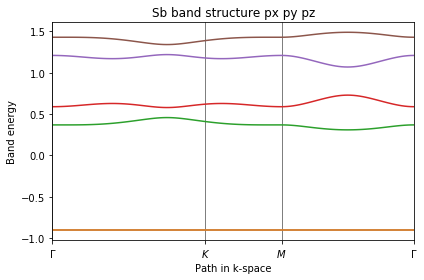

In [463]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt
def calculate(a_cc1,h,Vpppi,Vppsig):
    theta=atan(h/a_cc1)
    a=tan(theta)
    c=cos(theta)**2

    t1=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2
         ,(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
         cos(pi/6)*c*a*(Vpppi-Vppsig)]
    ,[(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
      Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
      cos(pi/3)*a*c*(Vppsig-Vpppi)]
    ,[cos(pi/6)*c*a*(Vpppi-Vppsig),
      cos(pi/3)*a*c*(Vppsig-Vpppi),
      cos(pi/3)*a*c*(Vppsig-Vpppi)]]

    t2=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2,
         -(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
         cos(pi/6)*c*a*(Vpppi-Vppsig)]
    ,[-(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
      Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
      cos(pi/3)*a*c*(Vppsig-Vpppi)]
    ,[cos(pi/6)*c*a*(Vpppi-Vppsig),
      cos(pi/3)*a*c*(Vppsig-Vpppi),
      cos(pi/3)*a*c*(Vppsig-Vpppi)]]

    t3=[[Vpppi,
         0,
         0]
    ,[0,
      c*Vppsig+(1-c)*Vpppi,
      a*c*(Vpppi-Vppsig)]
    ,[0,
      a*c*(Vpppi-Vppsig),
      cos(pi/3)*a*c*(Vppsig-Vpppi)]]
    #print(t1,t2,t3)
    lat=[[a_cc1,0.0,0],[0.5*a_cc1,np.sqrt(3.0)*a_cc1/2.0,0],[0,0,10*a_cc1]]

    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,h],[2./3.,2./3.,h],[2./3.,2./3.,h]]


    my_model=tb_model(2,3,lat,orb)


    delta=0.0

    my_model.set_onsite([delta,delta,-delta,delta,delta,-delta])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 0, 3, [ 0, -1,0])
    my_model.set_hop(t3[0][1], 0, 4, [ 0, -1,0])
    my_model.set_hop(t3[0][2], 0, 5, [ 0, -1,0])
    my_model.set_hop(t3[1][0], 1, 3, [ 0, -1,0])
    my_model.set_hop(t3[1][1], 1, 4, [ 0, -1,0])
    my_model.set_hop(t3[1][2], 1, 5, [ 0, -1,0])
    my_model.set_hop(t3[2][0], 2, 3, [ 0, -1,0])
    my_model.set_hop(t3[2][1], 2, 4, [ 0, -1,0])
    my_model.set_hop(t3[2][2], 2, 5, [ 0, -1,0])

    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(-t1[0][0], 0, 3, [ -1, 0,0])
    my_model.set_hop(-t1[0][1], 0, 4, [ -1, 0,0])
    my_model.set_hop(-t1[0][2], 0, 5, [ -1, 0,0])
    my_model.set_hop(-t1[1][0], 1, 3, [ -1, 0,0])
    my_model.set_hop(-t1[1][1], 1, 4, [ -1, 0,0])
    my_model.set_hop(-t1[1][2], 1, 5, [ -1, 0,0])
    my_model.set_hop(-t1[2][0], 2, 3, [ -1, 0,0])
    my_model.set_hop(-t1[2][1], 2, 4, [ -1, 0,0])
    my_model.set_hop(-t1[2][2], 2, 5, [ -1, 0,0])
    # print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')

    nk=121


    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)




    evals=my_model.solve_all(k_vec)



    fig, ax = plt.subplots()

    ax.set_xlim(k_node[0],k_node[-1])

    ax.set_xticks(k_node)
    ax.set_xticklabels(label)

    for n in range(len(k_node)):
      ax.axvline(x=k_node[n],linewidth=0.5, color='k')

    ax.set_title("Sb band structure px py pz")
    ax.set_xlabel("Path in k-space")
    ax.set_ylabel("Band energy")


    for i in range(len(orb)):
        ax.plot(k_dist,evals[i])


    fig.tight_layout()
#     fig.savefig("graphene.pdf")

#     print('Done.\n')
#     square_step=31
#     square_center=np.array([0,0])
#     square_length=2
#     # two-dimensional wf_array to store wavefunctions on the path
#     w_square=wf_array(my_model,[square_step,square_step])
#     all_kpt=np.zeros((square_step,square_step,2))
#     # now populate array with wavefunctions
#     for i in range(square_step):
#         for j in range(square_step):
#             # construct k-point on the square patch
#             kpt=np.array([square_length*(-0.5+float(i)/float(square_step-1)),
#                           square_length*(-0.5+float(j)/float(square_step-1))])
#             kpt+=square_center
#             # store k-points for plotting
#             all_kpt[i,j,:]=kpt
#             # find eigenvectors at this k-point
#             (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
#             # store eigenvector into wf_array object
#             w_square[i,j]=evec

#     # compute Berry flux on this square patch
#     print("Berry flux on square patch with length: ",square_length)
#     print("  centered at k-point: ",square_center)
#     print("  for band 0 equals    : ", w_square.berry_flux([0]))
#     print("  for band 1 equals    : ", w_square.berry_flux([4]))
#     print("  for both bands equals: ", w_square.berry_flux([0,4]))
#     print()

#     # also plot Berry phase on each small plaquette of the mesh
#     plaq=w_square.berry_flux([2,3],individual_phases=True)
#     #
#     fig, ax = plt.subplots()
#     plot=ax.imshow(plaq.T,origin="lower",
#               extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
#                       all_kpt[0,0,1],all_kpt[ 0,-2,1],))
#     ax.set_title("Berry curvature near Dirac cone")
#     ax.set_xlabel(r"$k_x$")
#     ax.set_ylabel(r"$k_y$")
#     fig.tight_layout()
#     plt.colorbar(plot)
#     fig.savefig("cone_phases.pdf")

#     print('Done.\n')
#     cut_one=my_model.cut_piece(2,0,glue_edgs=False)

#     cut_two=cut_one.cut_piece(2,1,glue_edgs=False)
#     (fig,ax)=cut_two.visualize(0,1)
#     ax.set_title("Graphene, finite")
#     ax.set_xlabel("x coordinate")
#     ax.set_ylabel("y coordinate")
#     fig.tight_layout()
a_cc1 = 1
h=0.0
Vpppi=-.10
Vppsig=.32
calculate(a_cc1,h,Vpppi,Vppsig)

Berry flux on square patch with length:  2
  centered at k-point:  [0 0]
  for band 0 equals    :  -12.110179126531278
  for band 1 equals    :  12.566370614359169
  for both bands equals:  -2.687875767325578



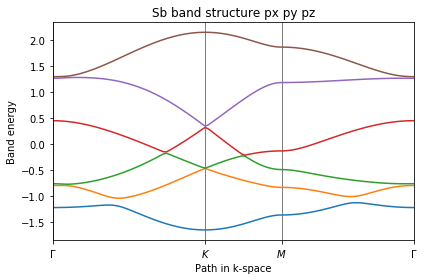

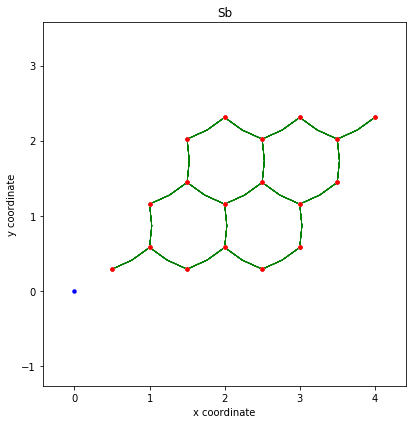

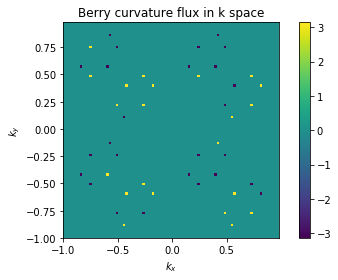

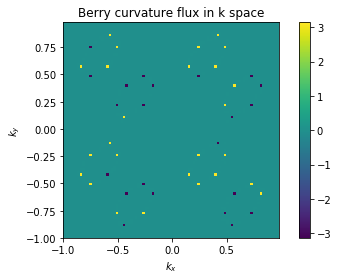

In [207]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi
import matplotlib.pyplot as plt

def plot():
    theta=atan(h/a_cc1)
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]

    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,h],[2./3.,2./3.,h],[2./3.,2./3.,h]]


    my_model=tb_model(2,3,lat,orb)


   
    t=-1.0

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')

    nk=121


    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)




    evals=my_model.solve_all(k_vec)



    fig, ax = plt.subplots()

    ax.set_xlim(k_node[0],k_node[-1])

    ax.set_xticks(k_node)
    ax.set_xticklabels(label)

    for n in range(len(k_node)):
      ax.axvline(x=k_node[n],linewidth=0.5, color='k')

    ax.set_title("Sb band structure px py pz")
    ax.set_xlabel("Path in k-space")
    ax.set_ylabel("Band energy")


    for i in range(len(orb)):
        ax.plot(k_dist,evals[i])


    fig.tight_layout()
    fig.savefig("graphene.pdf")
    cut_one=my_model.cut_piece(3,0,glue_edgs=False)

    cut_two=cut_one.cut_piece(3,1,glue_edgs=False)
    (fig,ax)=cut_two.visualize(0,1)
    ax.set_title("Sb")
    ax.set_xlabel("x coordinate")
    ax.set_ylabel("y coordinate")
    fig.tight_layout()
    #plt.show()
    square_step=91
    square_center=np.array([0,0])
    square_length=2
    # two-dimensional wf_array to store wavefunctions on the path
    w_square=wf_array(my_model,[square_step,square_step])
    all_kpt=np.zeros((square_step,square_step,2))
    # now populate array with wavefunctions
    for i in range(square_step):
        for j in range(square_step):
            # construct k-point on the square patch
            kpt=np.array([square_length*(-0.5+float(i)/float(square_step-1)),
                          square_length*(-0.5+float(j)/float(square_step-1))])
            kpt+=square_center
            # store k-points for plotting
            all_kpt[i,j,:]=kpt
            # find eigenvectors at this k-point
            (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
            # store eigenvector into wf_array object
            w_square[i,j]=evec

    # compute Berry flux on this square patch
    print("Berry flux on square patch with length: ",square_length)
    print("  centered at k-point: ",square_center)
    print("  for band 0 equals    : ", w_square.berry_flux([2]))
    print("  for band 1 equals    : ", w_square.berry_flux([3]))
    print("  for both bands equals: ", w_square.berry_flux([2,3]))
    print()

    # also plot Berry phase on each small plaquette of the mesh
    plaq=w_square.berry_flux([0,1,2],individual_phases=True)
    #
    fig, ax = plt.subplots()
    plot1=ax.imshow(plaq.T,origin="lower",
              extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                      all_kpt[0,0,1],all_kpt[ 0,-2,1],))
    ax.set_title("Berry curvature flux in k space")
    plt.colorbar(plot1)
    ax.set_xlabel(r"$k_x$")
    ax.set_ylabel(r"$k_y$")
    fig.tight_layout()
    fig.savefig("cone_phases.pdf")
    plt.show()
    plaq=w_square.berry_flux([3,4,5],individual_phases=True)
    #
    fig, ax = plt.subplots()
    plot1=ax.imshow(plaq.T,origin="lower",
              extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                      all_kpt[0,0,1],all_kpt[ 0,-2,1],))
    ax.set_title("Berry curvature flux in k space")
    plt.colorbar(plot1)
    ax.set_xlabel(r"$k_x$")
    ax.set_ylabel(r"$k_y$")
    fig.tight_layout()
    fig.savefig("cone_phases.pdf")
    plt.show()
a_cc1 = 1
h=.1
Vpi=-.29
Vsig=.98
delta=.25
delta1=-.39
plot()

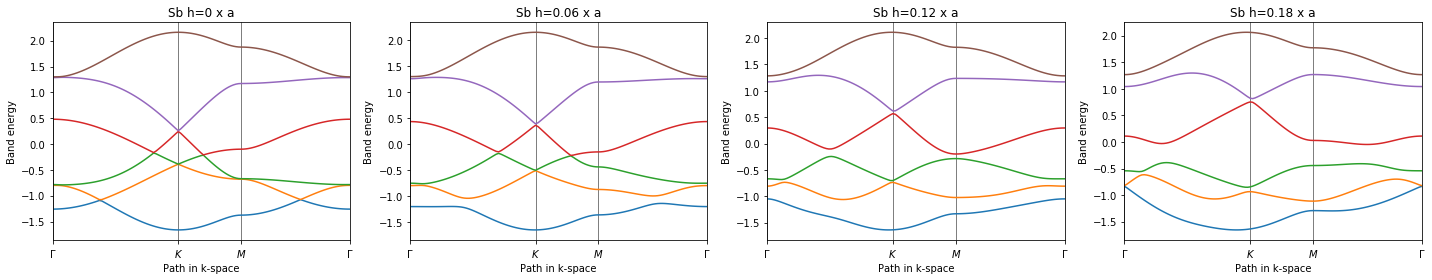

In [353]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi
import matplotlib.pyplot as plt

def plot(ax,height):
    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,h/10],[2./3.,2./3.,h/10],[2./3.,2./3.,h/10]]
    theta=atan(h/np.linalg.norm(np.array(orb[0][0:2])-np.array(orb[3][0:2])))
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]

    

    my_model=tb_model(2,3,lat,orb)


   
    t=-1.0

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')

    nk=121


    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)




    evals=my_model.solve_all(k_vec)



    

    ax.set_xlim(k_node[0],k_node[-1])

    ax.set_xticks(k_node)
    ax.set_xticklabels(label)

    for n in range(len(k_node)):
      ax.axvline(x=k_node[n],linewidth=0.5, color='k')

    ax.set_title("Sb h="+str(np.round(height,2))+" x a")
    ax.set_xlabel("Path in k-space")
    ax.set_ylabel("Band energy")


    for i in range(len(orb)):
        ax.plot(k_dist,evals[i])


    #fig.tight_layout()
    #return None
a_cc1 = 1
h=(0/100)*10
Vpi=-.29
Vsig=.98
delta=.25
delta1=-.39
fig, axs = plt.subplots(1,4,figsize=(20,4))
height=0
char='a'
for ax in axs.reshape(-1):
    a_cc1 = 1
    h=height
    Vpi=-.29
    Vsig=.98
    delta=.25
    delta1=-.39
    plot(ax,height)
    height+=0.06
fig.tight_layout()
fig.savefig("plot.png")

[[0.3333333333333333, 0.3333333333333333, 0], [0.3333333333333333, 0.3333333333333333, 0], [0.3333333333333333, 0.3333333333333333, 0], [0.6666666666666666, 0.6666666666666666, 0.0], [0.6666666666666666, 0.6666666666666666, 0.0], [0.6666666666666666, 0.6666666666666666, 0.0]]


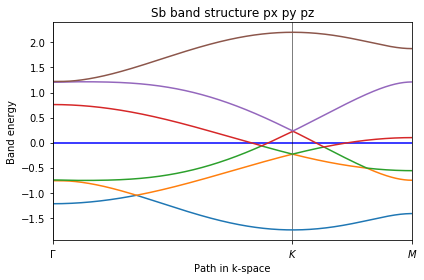

In [6]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi, atan
import matplotlib.pyplot as plt

def plot():
    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.+r,2./3.+r,h],[2./3.+r,2./3.+r,h],[2./3.+r,2./3.+r,h]]
    print(orb)
    theta=atan(h/np.linalg.norm(np.array(orb[0][0:2])-np.array(orb[3][0:2])))
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]
    
    

    my_model=tb_model(2,3,lat,orb)


   
    t=-1.0

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$')

    nk=1023


    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)




    evals=my_model.solve_all(k_vec)



    fig, ax = plt.subplots()

    ax.set_xlim(k_node[0],k_node[-1])

    ax.set_xticks(k_node)
    ax.set_xticklabels(label)

    for n in range(len(k_node)):
      ax.axvline(x=k_node[n],linewidth=0.5, color='k')

    ax.set_title("Sb band structure px py pz")
    ax.set_xlabel("Path in k-space")
    ax.set_ylabel("Band energy")

    ax.hlines(0,0,2,color='blue')
    for i in range(len(orb)):
        ax.plot(k_dist,evals[i])

    
    fig.tight_layout()
#     cut_one=my_model.cut_piece(8,0,glue_edgs=False)
#     #
#     (fig,ax)=cut_one.visualize(0,2)
#     ax.set_title("Graphene, ribbon")
#     ax.set_xlabel("x coordinate")
#     ax.set_ylabel("y coordinate")
#     fig.savefig("visualize_ribbon.pdf")
    return evals[2],evals[3]
r=0.0
a_cc1 = 1
h=0.0# (1.5/100)*10
y=0
Vpi=-.33
Vsig=.98
delta=.23
delta1=-.23
band1,band2=plot()
a=[]
# y=np.linspace(0,.27,40)
# for i in y:
#     h=i
#     band1,band2=plot()
#     t=band1-band2
    
#     a.append([max(t[0:650]),max(t[650:])])
# print(a)

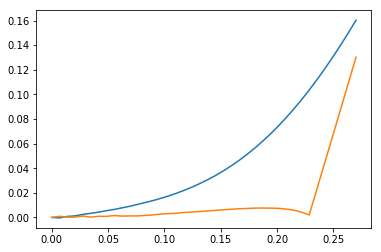

In [180]:
plt.plot(y,[-x[0]+a[0][0] for x in a])
plt.plot(y,[-x[1]+a[0][1] for x in a])


In [ ]:
cut_one=my_model.cut_piece(8,0,glue_edgs=False)
#
(fig,ax)=cut_one.visualize(0,1)
ax.set_title("Graphene, ribbon")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.savefig("visualize_ribbon.pdf")

(501, 501, 2)
done


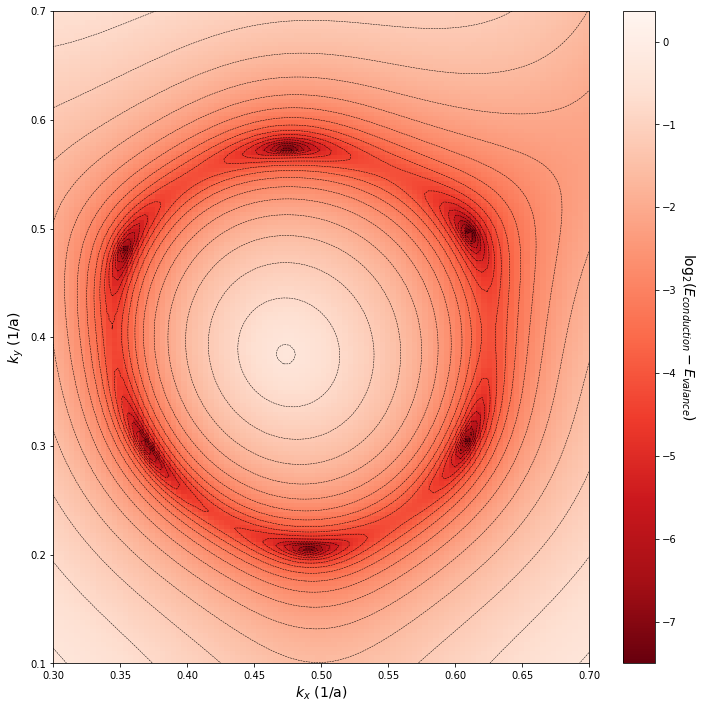

In [383]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi, atan
import matplotlib.pyplot as plt
from skimage import transform as tf
import math
def plot():
    theta=atan(h/a_cc1)
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]

    orb=[[1./3.+t,1./3.+t,0],[1./3.+t,1./3.+t,0],[1./3.+t,1./3.+t,0],[2./3.,2./3.,h],[2./3.,2./3.,h],[2./3.,2./3.,h]]


    my_model=tb_model(2,3,lat,orb)


   

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$')

    nk=1023


    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)
    #nx=ny=200
    #x = np.linspace(0, 1, nx)
    #y = np.linspace(0, 1, ny)
    k_mesh=np.zeros((nx,ny,2))
    for i in range(nx):
        for j in range(ny):
            k_mesh[i][j][0]=x[i]
            k_mesh[i][j][1]=y[j]

    print(k_mesh.shape)
    evals=my_model.solve_all(k_mesh.reshape(nx*ny,2))

    print("done")

    #plt.contour(xi, yi, evals[2], 15, linewidths = 0.5, colors = 'k')
    #plt.pcolormesh(xi, yi, evals[2], cmap = plt.get_cmap('rainbow_r'))
#     cut_one=my_model.cut_piece(8,0,glue_edgs=False)
#     #
#     (fig,ax)=cut_one.visualize(0,2)
#     ax.set_title("Graphene, ribbon")
#     ax.set_xlabel("x coordinate")
#     ax.set_ylabel("y coordinate")
#     fig.savefig("visualize_ribbon.pdf")
    return evals[2],evals[3]

a_cc1 = 1
h=0.1# (1.5/100)*10
y=0
Vpi=-.33
Vsig=.98
delta=.24
delta1=-.39
t=-.1


nx=ny=501
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
band1,band2=plot()
plt.figure(figsize=(12,12))




z=np.log2(-band1.reshape(nx,ny)+band2.reshape(nx,ny))
afine_tf = tf.AffineTransform(shear=-math.pi/6)
z1 = tf.warp(z, inverse_map=afine_tf)
plt.contour(x, y, z1, 20, linewidths = 0.5, colors = 'k')
plt.pcolormesh(x, y,z1, cmap = plt.get_cmap('Reds_r'))
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$\log_2(E_{conduction} - E_{valance})$', rotation=270, labelpad=20,size=14)
plt.xlabel(r'$k_x$ (1/a)', fontsize=14)
plt.ylabel(r'$k_y$ (1/a)', fontsize=14)
#ax.set_ticklabels(labels,update_ticks=True), labelpad=-1
plt.xlim([0.3,.7])
plt.ylim([0.1,0.7])

plt.show()
#plt.imshow(band1.reshape(nx,ny))

In [358]:

z=np.log2(-band1.reshape(nx,ny)+band2.reshape(nx,ny))
data = [
    go.Surface(
        z=z,
        contours=go.surface.Contours(
            z=go.surface.contours.Z(
              show=False,
              usecolormap=True,
              highlightcolor="#42f462",
              project=dict(z=True)
            )
        ),colorscale="YlGnBu",hoverinfo='none'
    ),
    go.Surface(z=Z1, showscale=False, opacity=1,colorscale="YlGnBu"),

]
layout = go.Layout(
    title='Bands 15,16',
    autosize=False,
    scene=dict(camera=dict(eye=dict(x=1.87, y=0.88, z=-0.64))),
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface-contours')

ValueError: cannot reshape array of size 1023 into shape (200,200)

(500, 500, 2)
done


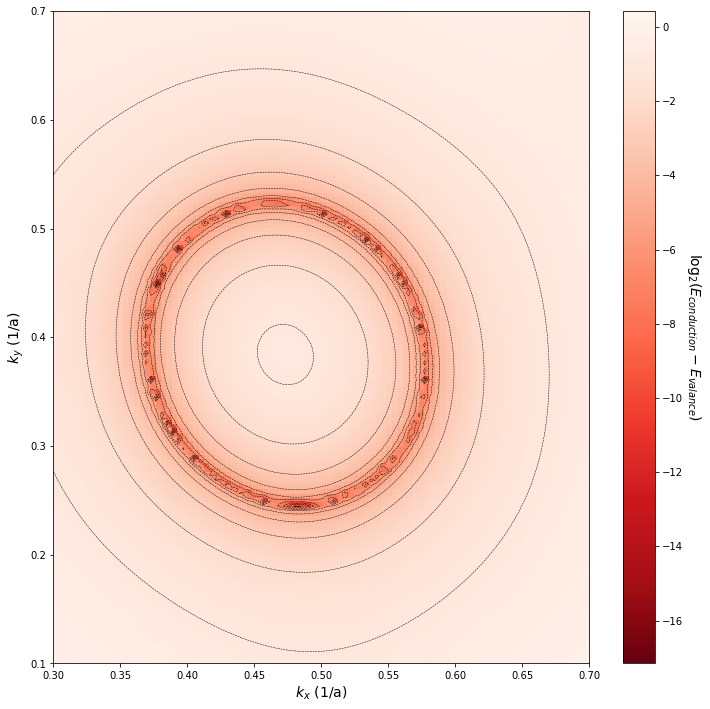

In [385]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi, atan
import matplotlib.pyplot as plt
from skimage import transform as tf
import math
def plot():
    theta=atan(h/a_cc1)
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]

    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,h],[2./3.,2./3.,h],[2./3.,2./3.,h]]


    my_model=tb_model(2,3,lat,orb)


   
    t=-1.0

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$')

    nk=1023


    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)
    #nx=ny=200
    #x = np.linspace(0, 1, nx)
    #y = np.linspace(0, 1, ny)
    k_mesh=np.zeros((nx,ny,2))
    for i in range(nx):
        for j in range(ny):
            k_mesh[i][j][0]=x[i]
            k_mesh[i][j][1]=y[j]

    print(k_mesh.shape)
    evals=my_model.solve_all(k_mesh.reshape(nx*ny,2))

    print("done")

    #plt.contour(xi, yi, evals[2], 15, linewidths = 0.5, colors = 'k')
    #plt.pcolormesh(xi, yi, evals[2], cmap = plt.get_cmap('rainbow_r'))
#     cut_one=my_model.cut_piece(8,0,glue_edgs=False)
#     #
#     (fig,ax)=cut_one.visualize(0,2)
#     ax.set_title("Graphene, ribbon")
#     ax.set_xlabel("x coordinate")
#     ax.set_ylabel("y coordinate")
#     fig.savefig("visualize_ribbon.pdf")
    return evals[2],evals[3]

a_cc1 = 1
h=0.0# (1.5/100)*10
y=0
Vpi=-.33
Vsig=.98
delta=.24
delta1=-.39
nx=ny=500
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
band1,band2=plot()
plt.figure(figsize=(12,12))




z=np.log2(-band1.reshape(nx,ny)+band2.reshape(nx,ny))
afine_tf = tf.AffineTransform(shear=-math.pi/6)
z1 = tf.warp(z, inverse_map=afine_tf)
plt.contour(x, y, z1, 20, linewidths = 0.5, colors = 'k')
plt.pcolormesh(x, y,z1, cmap = plt.get_cmap('Reds_r'))
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$\log_2(E_{conduction} - E_{valance})$', rotation=270, labelpad=20,size=14)
plt.xlabel(r'$k_x$ (1/a)', fontsize=14)
plt.ylabel(r'$k_y$ (1/a)', fontsize=14)
#ax.set_ticklabels(labels,update_ticks=True), labelpad=-1
plt.xlim([0.3,.7])
plt.ylim([0.1,0.7])

plt.show()

# z=np.log2(-band1.reshape(nx,ny)+band2.reshape(nx,ny))
# afine_tf = tf.AffineTransform(shear=-math.pi/6)
# z1 = tf.warp(z, inverse_map=afine_tf)
# plt.contour(x, y, z1, 3, linewidths = 0.5, colors = 'k')
# plt.pcolormesh(x, y,z1, cmap = plt.get_cmap('Reds_r'))
# plt.xlim([0,1])
# plt.ylim([0,1])
# #plt.imshow(band1.reshape(nx,ny))

In [139]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from skimage import transform as tf

from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi, atan
import matplotlib.pyplot as plt
from skimage import transform as tf
import math
def plot():
    theta=atan(h/a_cc1)
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]

    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,h],[2./3.,2./3.,h],[2./3.,2./3.,h]]


    my_model=tb_model(2,3,lat,orb)


   
    t=-1.0

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$')

    nk=1023


    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)
    #nx=ny=200
    #x = np.linspace(0, 1, nx)
    #y = np.linspace(0, 1, ny)
    k_mesh=np.zeros((nx,ny,2))
    for i in range(nx):
        for j in range(ny):
            k_mesh[i][j][0]=x[i]
            k_mesh[i][j][1]=y[j]

    print(k_mesh.shape)
    evals=my_model.solve_all(k_mesh.reshape(nx*ny,2))

    print("done")

    #plt.contour(xi, yi, evals[2], 15, linewidths = 0.5, colors = 'k')
    #plt.pcolormesh(xi, yi, evals[2], cmap = plt.get_cmap('rainbow_r'))
#     cut_one=my_model.cut_piece(8,0,glue_edgs=False)
#     #
#     (fig,ax)=cut_one.visualize(0,2)
#     ax.set_title("Graphene, ribbon")
#     ax.set_xlabel("x coordinate")
#     ax.set_ylabel("y coordinate")
#     fig.savefig("visualize_ribbon.pdf")
    return evals[2],evals[3]
afine_tf = tf.AffineTransform(shear=-math.pi/6)
a_cc1 = 1
h=0.0# (1.5/100)*10
y=0
Vpi=-.33
Vsig=.98
delta=.24
delta1=-.39
nx=ny=300
x = np.linspace(0, 3, nx)
y = np.linspace(0,3, ny)

band1,band2=plot()


Z1 = tf.warp(band1.reshape(nx,ny), inverse_map=afine_tf)
Z2=tf.warp(band2.reshape(nx,ny), inverse_map=afine_tf)
data = [
    go.Surface(
        z=Z2,
        contours=go.surface.Contours(
            z=go.surface.contours.Z(
              show=False,
              usecolormap=True,
              highlightcolor="#42f462",
              project=dict(z=True)
            )
        ),colorscale="YlGnBu",hoverinfo='none'
    ),
    go.Surface(z=Z1, showscale=False, opacity=1,colorscale="YlGnBu"),

]
layout = go.Layout(
    title='Bands 15,16',
    autosize=False,
    scene=dict(camera=dict(eye=dict(x=1.87, y=0.88, z=-0.64))),
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface-contours')

(300, 300, 2)
done


/usr/local/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [110]:

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi
import matplotlib.pyplot as plt

def plot():
    theta=atan(h/a_cc1)
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]

    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,h],[2./3.,2./3.,h],[2./3.,2./3.,h]]


    my_model=tb_model(2,3,lat,orb)


   
    t=-1.0

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')

    nk=121
    dk=2.*np.pi/(nk-1)
    k0=(np.arange(nk-1)+0.5)/(nk-1)
    kx=np.zeros((nk-1,nk-1),dtype=float)
    ky=np.zeros((nk-1,nk-1),dtype=float)
    sq3o2=np.sqrt(3.)/2.
    for i in range(nk-1):
        for j in range(nk-1):
            kx[i,j]=sq3o2*k0[i]
            ky[i,j]= -0.5*k0[i]+k0[j]

    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)



    sq3o2=np.sqrt(3.)/2.
    evals=my_model.solve_all(k_vec)

    square_step=51
    square_center=np.array([0.33,-.35])
    square_length=.35
    #fig,ax=plt.subplots(1,2,figsize=(11,11))
    labs=['(a)','(b)','(c)']
    j=0
    # compute Berry curvature and Chern number for three values of t2

    my_array=wf_array(my_model,[nk,nk])
    my_array.solve_on_grid([0.,0.])
    bcurv=my_array.berry_flux([0,1,2],individual_phases=True)/(dk*dk)
    chern=my_array.berry_flux([0,1,2])/(2.*np.pi)
    return chern
#     print('Chern number =',"%8.5f"%chern)

#     # make contour plot of Berry curvature
#     pos_lvls= 0.02*np.power(2.,np.linspace(0,8,2))
#     neg_lvls=-0.02*np.power(2.,np.linspace(8,0,2))
#     ax[0].contour(kx,ky,bcurv,levels=pos_lvls,colors='k')
#     ax[0].contour(kx,ky,bcurv,levels=neg_lvls,colors='r',linewidths=1.4)

#     # remove rectangular box and draw parallelogram, etc.
#     ax[0].xaxis.set_visible(False)
#     ax[0].yaxis.set_visible(False)
#     for loc in ["top","bottom","left","right"]:
#         ax[0].spines[loc].set_visible(False)
#     ax[0].set(aspect=1.)
#     ax[0].plot([0,sq3o2,sq3o2,0,0],[0,-0.5,0.5,1,0],color='k',linewidth=1.4)
#     ax[0].set_xlim(-0.05,sq3o2+0.05)
#     ax[0].text(-.35,0.88,labs[j],size=24.)
    
    
    #-------------------------------------------------
    
#     churn=0
#     chern=my_array.berry_flux([3])/(2.*np.pi)
#     print('Chern number =',"%8.5f"%chern)

#     # make contour plot of Berry curvature
#     pos_lvls= 0.02*np.power(2.,np.linspace(0,8,2))
#     neg_lvls=-0.02*np.power(2.,np.linspace(8,0,2))
#     ax[1].contour(kx,ky,bcurv,levels=pos_lvls,colors='k')
#     ax[1].contour(kx,ky,bcurv,levels=neg_lvls,colors='r',linewidths=1.4)

#     # remove rectangular box and draw parallelogram, etc.
#     ax[1].xaxis.set_visible(False)
#     ax[1].yaxis.set_visible(False)
#     for loc in ["top","bottom","left","right"]:
#         ax[1].spines[loc].set_visible(False)
#     ax[1].set(aspect=1.)
#     ax[1].plot([0,sq3o2,sq3o2,0,0],[0,-0.5,0.5,1,0],color='k',linewidth=1.4)
#     ax[1].set_xlim(-0.05,sq3o2+0.05)
#     ax[1].text(-.35,0.88,labs[j],size=24.)
    

a_cc1 = 1
h=.06
Vpi=-.33
Vsig=.98
delta=.24
delta1=-.39
new=[]
for i in np.linspace(0,.1,30):
    h=np.round(i,3)
    chern=plot()
    new.append(chern)
    print(str(h)+"  "+str(np.round(chern,2))+"\n")
    

0.0  -3.31

0.003  -1.0

0.007  1.0

0.01  -1.0

0.014  -1.0

0.017  1.0

0.021  -2.0

0.024  2.0

0.028  -1.0

0.031  -0.0

0.034  -1.0

0.038  -2.0

0.041  1.0

0.045  1.0

0.048  0.0

0.052  4.0

0.055  -3.0

0.059  -0.0

0.062  -0.0

0.066  -2.0

0.069  0.0

0.072  -1.0

0.076  -0.0

0.079  0.0

0.083  0.0

0.086  -1.0

0.09  -2.0

0.093  1.0

0.097  3.0

0.1  4.0



Chern number =  0.00000


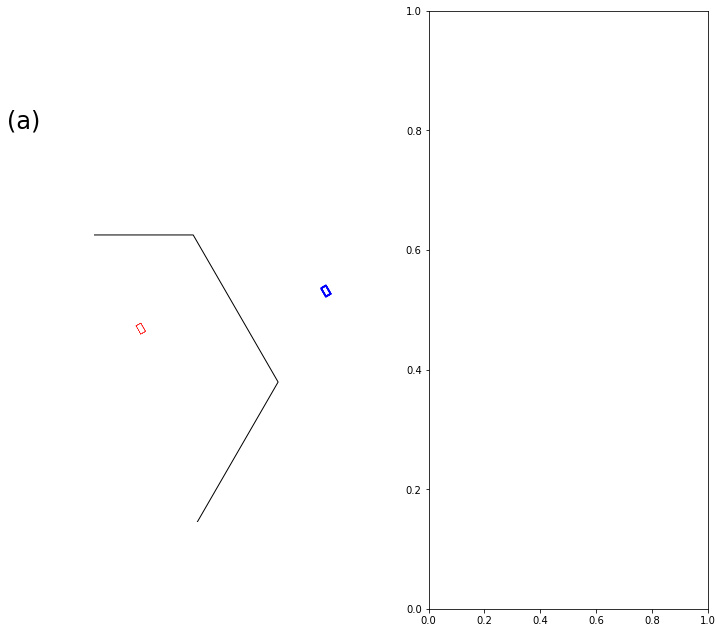

In [288]:

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
def plot():
    theta=atan(h/a_cc1)
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]

    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,h],[2./3.,2./3.,h],[2./3.,2./3.,h]]


    my_model=tb_model(2,3,lat,orb)


   
    t=-1.0

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
    nk=51
    1
    dk=2.*np.pi/(nk-1)
    k0=(np.arange(nk-1)+0.5)/(nk-1)
    kx=np.zeros((nk-1,nk-1),dtype=float)
    ky=np.zeros((nk-1,nk-1),dtype=float)
    sq3o2=np.sqrt(3.)/2.
    for i in range(nk-1):
        for j in range(nk-1):
            kx[i,j]=sq3o2*k0[i]
            ky[i,j]= -0.5*k0[i]+k0[j]

    fig,ax=plt.subplots(1,2,figsize=(11,11))
    labs=['(a)','(b)','(c)']
    my_array=wf_array(my_model,[nk,nk])
    my_array.solve_on_grid([0.,0.])
    
    bcurv=my_array.berry_flux([0,1,2],individual_phases=True)/(dk*dk)
    chern=my_array.berry_flux([0,1,2])/(2.*np.pi)
    print('Chern number =',"%8.5f"%chern)

    # make contour plot of Berry curvature
    pos_lvls= 4.02*np.power(2.,np.linspace(0,2,5))
    neg_lvls=-4.02*np.power(2.,np.linspace(2,0,5))
    j=0
    ax[j].contour(kx,ky,bcurv,levels=pos_lvls,colors='blue')
    ax[j].contour(kx,ky,bcurv,levels=neg_lvls,colors='r',linewidths=.4)

    # remove rectangular box and draw parallelogram, etc.
    ax[j].xaxis.set_visible(False)
    ax[j].yaxis.set_visible(False)
    for loc in ["top","bottom","left","right"]:
        ax[j].spines[loc].set_visible(False)
    ax[j].set(aspect=1.)
    hex = RegularPolygon((0, 0), numVertices=6, radius=.588, 
                         orientation=np.radians(30),facecolor='White', edgecolor='k')
    ax[j].add_patch(hex)
    #ax[j].plot([0,sq3o2,sq3o2,0,0],[0,-0.5,0.5,1,0],color='k',linewidth=1.4)
    ax[j].set_xlim(-0.05,sq3o2+0.05)
    ax[j].text(-.35,0.88,labs[j],size=24.)
    berry=bcurv
    my_array=wf_array(my_model,[nk,nk])
    my_array.solve_on_grid([0.,0.])
#     #-------------------------------------------------
#     bcurv=my_array.berry_flux([3,4,5],individual_phases=True)/(dk*dk)
#     chern=my_array.berry_flux([3,4,5])/(2.*np.pi)
#     print('Chern number =',"%8.5f"%chern)

#     # make contour plot of Berry curvature
#     pos_lvls= 0.02*np.power(2.,np.linspace(0,8,4))
#     neg_lvls=-0.02*np.power(2.,np.linspace(8,0,4))
#     j=1
#     ax[j].contour(kx,ky,bcurv,levels=pos_lvls,colors='blue')
#     ax[j].contour(kx,ky,bcurv,levels=neg_lvls,colors='r',linewidths=.4)

#     # remove rectangular box and draw parallelogram, etc.
#     ax[j].xaxis.set_visible(False)
#     ax[j].yaxis.set_visible(False)
#     for loc in ["top","bottom","left","right"]:
#         ax[j].spines[loc].set_visible(False)
#     ax[j].set(aspect=1.)
#     #ax[j].plot([0,sq3o2,sq3o2,0,0],[0,-0.5,0.5,1,0],color='k',linewidth=1.4)
#     ax[j].set_xlim(-0.05,sq3o2+0.05)
#     ax[j].text(-.35,0.88,labs[j],size=24.)
#     hex = RegularPolygon((0, 0), numVertices=6, radius=.588, 
#                          orientation=np.radians(30),facecolor='White', edgecolor='k')
#     ax[j].add_patch(hex)

    return berry

    
    

a_cc1 = 1
h=0.5
Vpi=-.33
Vsig=.98
delta=.24
delta1=-.23
new=[]
berry=plot()

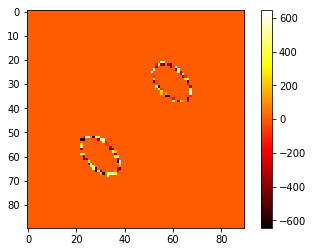

In [285]:
nk=91
dk=2.*np.pi/(nk-1)
k0=(np.arange(nk-1)+0.5)/(nk-1)
kx=np.zeros((nk-1,nk-1),dtype=float)
ky=np.zeros((nk-1,nk-1),dtype=float)
sq3o2=np.sqrt(3.)/2.
for i in range(nk-1):
    for j in range(nk-1):
        kx[i,j]=sq3o2*k0[i]
        ky[i,j]= -0.5*k0[i]+k0[j]
plt.imshow(berry,cmap="hot")
plt.colorbar()

In [315]:
h=.5
orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.,2./3.,h],[2./3.,2./3.,h],[2./3.,2./3.,h]]
np.linalg.norm(np.array(orb[0][0:2])-np.array(orb[3][0:2]))

0.4714045207910317

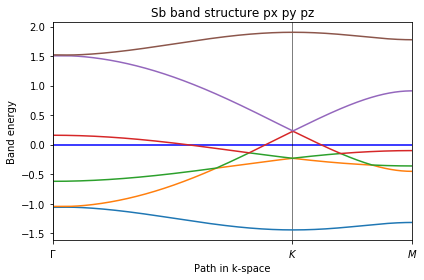

In [26]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
from math import tan, cos, pi, atan
import matplotlib.pyplot as plt

def plot():
    orb=[[1./3.,1./3.,0],[1./3.,1./3.,0],[1./3.,1./3.,0],[2./3.+r,2./3.+r,h],[2./3.+r,2./3.+r,h],[2./3.+r,2./3.+r,h]]
    
    theta=atan(h/np.linalg.norm(np.array(orb[0][0:2])-np.array(orb[3][0:2])))
    a=tan(theta)
    c=cos(theta)**2

    e1xx=Vpi*(1-c*cos(pi/6)**2)+Vsig*c*cos(pi/6)**2;
    e1yy=Vpi*(1-c*cos(pi/3)**2)+Vsig*c*cos(pi/3)**2;
    e1zz=Vsig*(a**2*c)+Vpi*(1-a**2*c);
    e1xy=(Vpi-Vsig)*c*cos(pi/6)*cos(pi/3);
    e1xz=cos(pi/3)*c*a*(Vpi-Vsig);
    e1yz=cos(pi/6)*c*a*(Vsig-Vpi);

    e3xx=Vpi;
    e3yy=Vsig*(c*cos(pi/3)**2)+(1-c*cos(pi/3)**2);
    e3zz=e1zz;
    e3xy=0;
    e3xz=0;
    e3yz=c*a*(Vpi-Vsig);

    e2xx=e1xx;
    e2yy=e1yy;
    e2zz=e1zz;
    e2xy=-e1xy;
    e2xz=-e1xz;
    e2yz=e1yz;

    t1=[[e1xx,e1xy,e1xz],
        [e1xy,e1yy,e1yz],
        [e1xz,e1yz,e1zz]]
    t2=[[e2xx,e2xy,e2xz],
        [e2xy,e2yy,e2yz],
        [e2xz,e2yz,e2zz]]
    t3=[[e3xx,e3xy,e3xz],
        [e3xy,e3yy,e3yz],
        [e3xz,e3yz,e3zz]]
    lat=[[1,0.0,0],[0.5,np.sqrt(3.0)/2.0,0],[0,0,10]]
    
    

    my_model=tb_model(2,3,lat,orb)


   
    t=-1.0

    my_model.set_onsite([delta,delta,delta1,delta,delta,delta1])


    my_model.set_hop(t2[0][0], 0, 3, [ 0, 0,0])
    my_model.set_hop(t2[0][1], 0, 4, [ 0, 0,0])
    my_model.set_hop(t2[0][2], 0, 5, [ 0, 0,0])
    my_model.set_hop(t2[1][0], 1, 3, [ 0, 0,0])
    my_model.set_hop(t2[1][1], 1, 4, [ 0, 0,0])
    my_model.set_hop(t2[1][2], 1, 5, [ 0, 0,0])
    my_model.set_hop(t2[2][0], 2, 3, [ 0, 0,0])
    my_model.set_hop(t2[2][1], 2, 4, [ 0, 0,0])
    my_model.set_hop(t2[2][2], 2, 5, [ 0, 0,0])

    my_model.set_hop(t3[0][0], 3, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][1], 4, 0, [ 1, 0,0])
    my_model.set_hop(t3[0][2], 5, 0, [ 1, 0,0])
    my_model.set_hop(t3[1][0], 3, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][1], 4, 1, [ 1, 0,0])
    my_model.set_hop(t3[1][2], 5, 1, [ 1, 0,0])
    my_model.set_hop(t3[2][0], 3, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][1], 4, 2, [ 1, 0,0])
    my_model.set_hop(t3[2][2], 5, 2, [ 1, 0,0])



    # my_model.set_hop(t3[0][0], 3, 3, [ 1, -1,0])
    # my_model.set_hop(t3[0][1], 3, 4, [ 1, -1,0])
    # my_model.set_hop(t3[0][2], 3, 5, [ 1, -1,0])
    # my_model.set_hop(t3[0][0], 4, 3, [ 1, -1,0])
    # my_model.set_hop(t3[1][1], 4, 4, [ 1, -1,0])
    # my_model.set_hop(t3[1][2], 4, 5, [ 1, -1,0])
    # my_model.set_hop(t3[2][0], 5, 3, [ 1, -1,0])
    # my_model.set_hop(t3[2][1], 5, 4, [ 1, -1,0])
    # my_model.set_hop(t3[2][2], 5, 5, [ 1, -1,0])

    my_model.set_hop(t1[0][0], 3, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][1], 4, 0, [ 0, 1,0])
    my_model.set_hop(t1[0][2], 5, 0, [ 0, 1,0])
    my_model.set_hop(t1[1][0], 3, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][1], 4, 1, [ 0, 1,0])
    my_model.set_hop(t1[1][2], 5, 1, [ 0, 1,0])
    my_model.set_hop(t1[2][0], 3, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][1], 4, 2, [ 0, 1,0])
    my_model.set_hop(t1[2][2], 5, 2, [ 0, 1,0])
    #print tight-binding model
    #my_model.display()

    # generate list of k-points following a segmented path in the BZ
    # list of nodes (high-symmetry points) that will be connected
    path=[[0.,0.],[2./3.,1./3.],[.5,.5]]
    # labels of the nodes
    label=(r'$\Gamma $',r'$K$', r'$M$')

    nk=1023


    (k_vec,k_dist,k_node)=my_model.k_path(path,nk,report=False)




    evals=my_model.solve_all(k_vec)



    fig, ax = plt.subplots()

    ax.set_xlim(k_node[0],k_node[-1])

    ax.set_xticks(k_node)
    ax.set_xticklabels(label)

    for n in range(len(k_node)):
      ax.axvline(x=k_node[n],linewidth=0.5, color='k')

    ax.set_title("Sb band structure px py pz")
    ax.set_xlabel("Path in k-space")
    ax.set_ylabel("Band energy")

    ax.hlines(0,0,2,color='blue')
    for i in range(len(orb)):
        ax.plot(k_dist,evals[i])

    
    fig.tight_layout()
#     cut_one=my_model.cut_piece(8,0,glue_edgs=False)
#     #
#     (fig,ax)=cut_one.visualize(0,2)
#     ax.set_title("Graphene, ribbon")
#     ax.set_xlabel("x coordinate")
#     ax.set_ylabel("y coordinate")
#     fig.savefig("visualize_ribbon.pdf")
    return evals[2],evals[3]
r=0.0
a_cc1 = 1
h=0.00# (1.5/100)*10
y=0
Vpi=-.13
Vsig=.98
delta=.23
delta1=-.23
band1,band2=plot()
a=[]
# y=np.linspace(0,.27,40)
# for i in y:
#     h=i
#     band1,band2=plot()
#     t=band1-band2
    
#     a.append([max(t[0:650]),max(t[650:])])
# print(a)